In [1]:
import pandas as pd
import numpy as np; np.random.seed(1)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [8]:
data = pd.read_excel('C:\\Users\\jeygu\\OneDrive\\Documentos\\Archivos personales\\Jeyson Docs\\Cursos\\DS4A\\ds4a-team-62\\data\\raw\\er_admission.xlsx', sheet_name = 'Data')

In [9]:
data

,Site,DayWeek_coded,Shift_coded,Arr_Amb,Gender,Age_band,IMD_quintile,Ethnicity,ACSC,Consultant_on_duty,ED bed occupancy,Inpatient_bed_occupancy,Arrival intensity,LAS intensity,LWBS intensity,Stay_length,Last_10_mins,Admission_ALL
0,1.0,1.0,1.0,0.0,1.0,2.0,4.0,1.0,0.0,1.0,1.078947,0.97783,21.0,0.095238,0.058824,78.0,0.0,1.000000
1,1.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,1.736842,0.97783,24.0,0.041667,0.000000,202.0,0.0,1.000000
2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.842105,0.97783,28.0,0.250000,0.083333,234.0,1.0,1.000000
3,1.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,1.842105,0.97783,28.0,0.250000,0.083333,239.0,1.0,1.000000
4,1.0,1.0,1.0,0.0,0.0,1.0,5.0,6.0,0.0,1.0,1.763158,0.97783,36.0,0.138889,0.000000,227.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,3.0,7.0,0.0,1.0,1.0,0.0,2.0,6.0,NaN,0.0,1.347826,0.96000,5.0,0.400000,0.000000,234.0,1.0,1.000000
19733,3.0,7.0,0.0,0.0,1.0,1.0,5.0,2.0,0.0,0.0,1.347826,0.96000,5.0,0.400000,0.000000,79.0,0.0,0.000000
19734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6263.000000


## Exploratory Data Analysis

In this section we are going to make Exploratory Data Analysis in order to understand our information, know our data, identify characteristics of each variable, possible errors and calculate descriptive statistics.

In [10]:
data.shape

(19737, 18)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19734 entries, 0 to 19733
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     19734 non-null  float64
 1   DayWeek_coded            19734 non-null  float64
 2   Shift_coded              19734 non-null  float64
 3   Arr_Amb                  19734 non-null  float64
 4   Gender                   19734 non-null  float64
 5   Age_band                 19734 non-null  float64
 6   IMD_quintile             19734 non-null  float64
 7   Ethnicity                19721 non-null  float64
 8   ACSC                     18850 non-null  float64
 9   Consultant_on_duty       19734 non-null  float64
 10  ED bed occupancy         19734 non-null  float64
 11  Inpatient_bed_occupancy  19734 non-null  float64
 12  Arrival intensity        19734 non-null  float64
 13  LAS intensity            19734 non-null  float64
 14  LWBS intensity        

The dataset has 19737 patients and 18 variables of their personal information and data about the admission. Let's see the state of the dataset regarding to null values.

<AxesSubplot:>

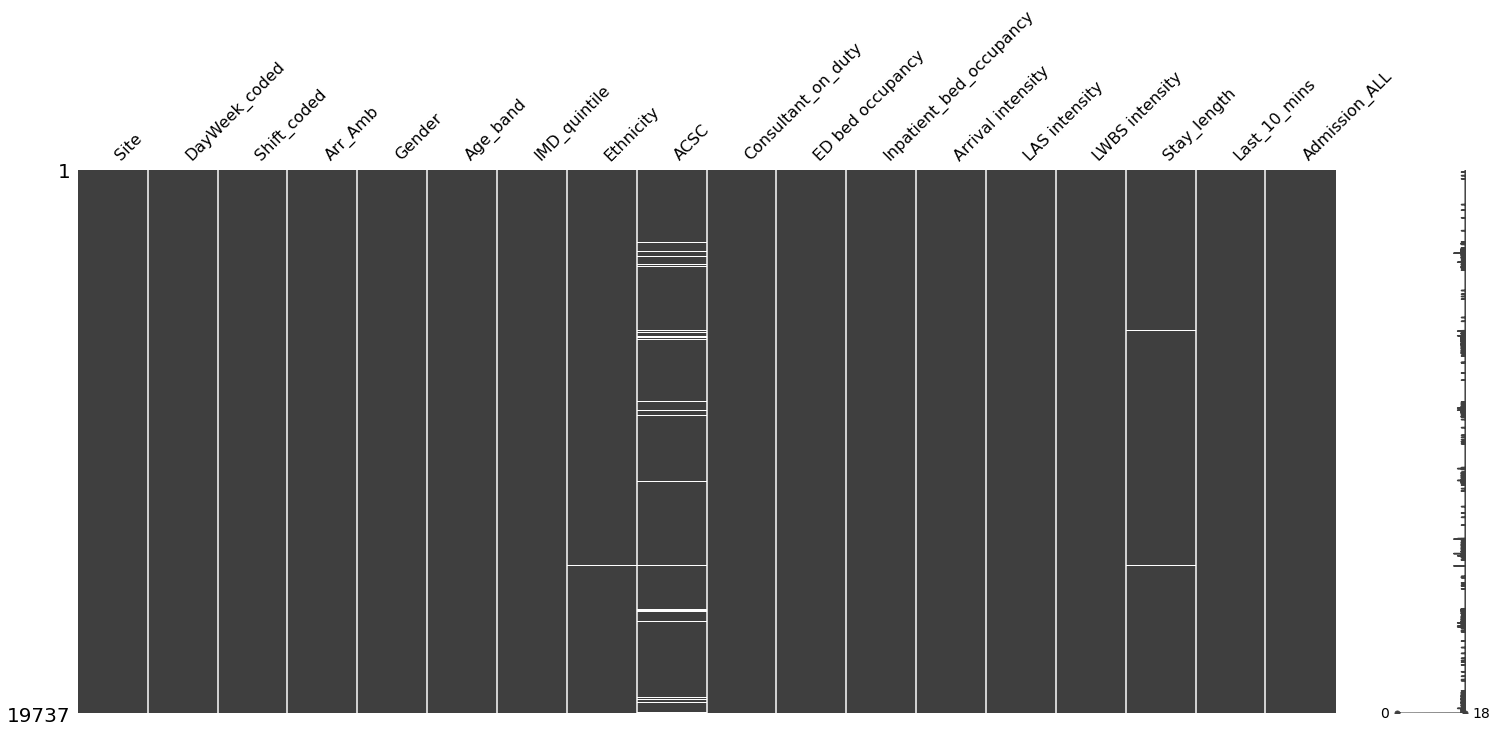

In [11]:
msno.matrix(data)

In [12]:
values_drop = data.isnull().sum(axis = 1) >= 17 
data = data[values_drop == False]
data.shape

(19734, 18)

Following paragrahps it´s shown some interesting graphics and relationship among them:

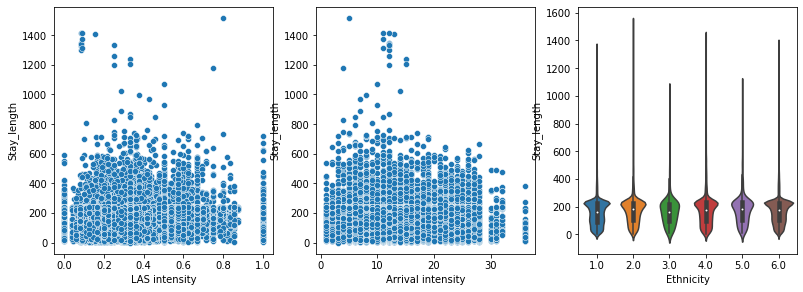

In [53]:
varstolook = ["LAS intensity","Arrival intensity", "Ethnicity"] #Set variables to observe 

plt.figure(figsize=(18,10)) #Make scatterplots of variables in order to determine its distribution
for i, var in enumerate(varstolook):
    plt.subplot(2, 4, i + 1)
    if var in ["LAS intensity","Arrival intensity"]:
        sns.scatterplot(x = var, y  = "Stay_length", data = data)
    else:
        sns.violinplot(x = var, y  = "Stay_length", data = data) 

Ethnicity code (1 = Asian/Asian British, 2 = Black/Black British, 3 = Mixed, 4 = Other, 5 = Unknown, 6 = White British)

As we can notice at ambulance arrival intensity (LAS intensity) and arrival intensity look like that exist a patron between those variables. By other hand ethnicity data concentration is similar for each group of people in terms of stay lenght.

c:\Users\jeygu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


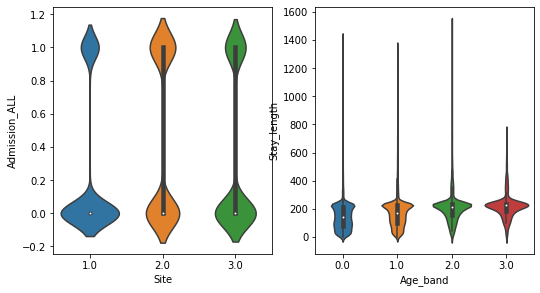

In [57]:
varstolook = ["Site", "Age_band"] #Set variables to observe
plt.figure(figsize=(18,10)) #Make scatterplots of variables in order to determine its distribution
for i, var in enumerate(varstolook):
    plt.subplot(2, 4, i + 1)
    if var in ["Site"]:
       sns.violinplot(x = var, y  = "Admission_ALL", data = data)
    else:
        sns.violinplot(x = var, y  = "Stay_length", data = data)

Patient age, banded (0 = 16-34, 1 = 35-64, 2 = 65-84, 3 = 85 and over)

Age band graphic we can observe an interesting trend for 0 to 2 group because of it's concentration data, this differs for third gruoup that it's outliers seems to be less than others groups. We'll go deeper in this behavior and it´s posible reasons.

In [13]:
data.isnull().sum(axis = 0)

Site                         0
DayWeek_coded                0
Shift_coded                  0
Arr_Amb                      0
Gender                       0
Age_band                     0
IMD_quintile                 0
Ethnicity                   13
ACSC                       884
Consultant_on_duty           0
ED bed occupancy             0
Inpatient_bed_occupancy      0
Arrival intensity            0
LAS intensity                0
LWBS intensity               0
Stay_length                 21
Last_10_mins                 8
Admission_ALL                0
dtype: int64

Rows with information for just one variable or less were removed due to lack of data. As we can appreciate, most of the variables has no null values which is good, except for ACSC (Diagnostic code indicating presentation as a result of an ambulatory care sensitive condition), Stay_length and Ethnicity.

## Correlation

<AxesSubplot:>

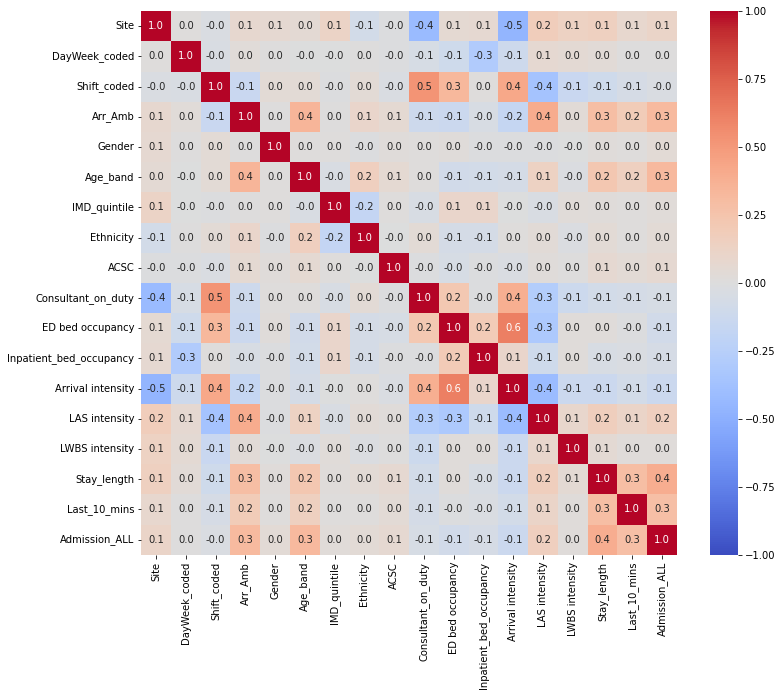

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, cmap="coolwarm", fmt='.1f',)

We found some significant linear correlation between some variables, the strongest positivesare between:
 - ED bed occupancy and arrival intensity (0.6): this relation makes sense, because i expect that with higher number of patients arriving the number of occupied bed in the emergency department will increase.
 - Consultant on duty and Shift coded (0.5): this shows us that is more likely to find a consultant in duty during day.
 
And the strongest negative linear correlation are between:
- Arrival intensity and site (0.5): this indicates that higher patients arrival occurs in smaller sites number, but it is important to remember that sites is the number given to a location, so a relation between this number does not have an impact.

In [56]:
categorical_var = ["Site", "DayWeek_coded", "Shift_coded", "Arr_Amb", "Gender", "IMD_quintile", "Ethnicity", "ACSC", \
                   "Consultant_on_duty"]
for var in categorical_var:
    data[var] = data[var].astype("category")
data.dtypes

C:\Users\jeygu\AppData\Local\Temp\ipykernel_4896\2292876797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[var] = data[var].astype("category")


Site                       category
DayWeek_coded              category
Shift_coded                category
Arr_Amb                    category
Gender                     category
Age_band                    float64
IMD_quintile               category
Ethnicity                  category
ACSC                       category
Consultant_on_duty         category
ED bed occupancy            float64
Inpatient_bed_occupancy     float64
Arrival intensity           float64
LAS intensity               float64
LWBS intensity              float64
Stay_length                 float64
Last_10_mins                float64
Admission_ALL               float64
dtype: object